In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv("Hotel Reservations.csv")
pd.set_option('display.max_columns', None)


In [2]:
df.tail(20)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36255,INN36256,2,0,2,0,Meal Plan 1,0,Room_Type 1,28,2018,9,18,Online,0,0,0,149.00,1,Not_Canceled
36256,INN36257,1,0,0,1,Meal Plan 1,0,Room_Type 1,15,2018,2,19,Corporate,0,0,0,81.00,0,Not_Canceled
36257,INN36258,2,0,0,2,Meal Plan 2,0,Room_Type 1,286,2018,9,16,Offline,0,0,0,117.00,0,Canceled
36258,INN36259,2,0,2,2,Meal Plan 1,0,Room_Type 4,40,2018,8,13,Online,0,0,0,149.40,2,Not_Canceled
36259,INN36260,3,0,0,3,Meal Plan 1,0,Room_Type 1,16,2017,9,9,Online,0,0,0,131.00,2,Not_Canceled
36260,INN36261,3,0,1,4,Meal Plan 1,1,Room_Type 4,178,2018,8,1,Online,0,0,0,137.25,1,Canceled
36261,INN36262,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
36262,INN36263,2,0,2,0,Not Selected,0,Room_Type 1,26,2018,8,7,Online,0,0,0,143.50,1,Not_Canceled
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled
36264,INN36265,2,0,0,2,Meal Plan 1,0,Room_Type 4,187,2018,7,8,Online,0,0,0,105.30,0,Canceled


In [3]:
df["booking_status"] = df["booking_status"].replace("Not_Canceled", "Not_Cancelled")
df["booking_status"] = df["booking_status"].replace("Canceled", "Cancelled") # I learned UK English, had to change it.
# Afterwards wanted to create a new column called "booking_cxl"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df.value_counts("no_of_adults")

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

In [5]:
df.value_counts("no_of_children")

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [6]:
df.value_counts("no_of_weekend_nights")

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [7]:
df.value_counts("no_of_week_nights")

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [8]:
df.value_counts("type_of_meal_plan")

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [9]:
df.value_counts("required_car_parking_space") # 0 = no , 1 = yes

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64

In [10]:
df.value_counts("room_type_reserved")

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [11]:
df.value_counts("lead_time") # kinda useless (doing the value_counts), there is a lot of them (352)
df["lead_time"].nunique()

352

In [12]:
df.value_counts("market_segment_type") # Skipped the 3 columns that were with the dates because
                                       # value_counts means nothing here

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [13]:
df.value_counts("repeated_guest") # there is +36k guests and just almost 1k booked more than once

repeated_guest
0    35345
1      930
Name: count, dtype: int64

In [14]:
df.value_counts("no_of_previous_cancellations")

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [15]:
df.value_counts("no_of_previous_bookings_not_canceled")

no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
9        19
10       19
11       15
12       12
14        9
15        8
16        7
13        7
17        6
18        6
19        6
20        6
21        6
22        6
23        3
24        3
25        3
27        3
31        2
48        2
44        2
32        2
29        2
30        2
26        2
28        2
46        1
57        1
56        1
55        1
54        1
53        1
52        1
51        1
50        1
49        1
47        1
45        1
33        1
43        1
42        1
41        1
40        1
39        1
38        1
37        1
36        1
35        1
34        1
58        1
Name: count, dtype: int64

In [16]:
df.value_counts("no_of_special_requests")

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64

In [17]:
df.value_counts("booking_status")

booking_status
Not_Cancelled    24390
Cancelled        11885
Name: count, dtype: int64

##### After doing all the value counts that could matter I can say:
- Reservations are mostly for two people (~72%) and/or without children (92,5%).
- Aprox half of the reservations were for the weekend or during it.
- Should I do a column for the TOTAL days of the reservation??
- Not sure what "type_of_meal" values are. Probably going to ignore them for now.
- Most of the guests are "first timers"
- People do not tend to cancel several times different bookings in the same hotel(99.13%). People who do are probably the ones who already go often.
- Would like to see if "no_of_special_requests" has something to do with the cancellation of the booking.
- It could be interesting to see if the "market_segment_type" afects towards the cancellation of the reservation.

#### Hipotesis:
- The probabilities for someone to cancel the reservation is higher when they:
  - Book in advance
  - Do not have many special requests

In [19]:
df[["lead_time", "booking_status"]].groupby("booking_status").mean()
# this can suggest us that cancellations are made in the reservations made with more time

,lead_time
booking_status,
Cancelled,139.215482
Not_Cancelled,58.927224


In [20]:
df.describe(include = "object")

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Cancelled
freq,1,27835,28130,23214,24390


In [21]:
df.isnull().sum() #There are no null inputs.

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [22]:
df.describe() # Brief overview for all variables

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [23]:
# Creating a new column to change the values from "booking_status" into numbers 0 or 1
def its_cancelled(cancelled_int):
    """
    To create a new column to change the values from "booking_status" into numbers 0 or 1
    """
    return "0" if re.search(r"not_", cancelled_int, re.IGNORECASE) else "1"

df["booking_cxl"] = df["booking_status"].astype(str).apply(its_cancelled)
# I used this function into the previous correlation graph

In [24]:
# Graph of correlation for the numeric variables
df_num_vars = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_cxl']]
corr = df_num_vars.corr()
corr.style.background_gradient(cmap='coolwarm')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_cxl
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.097287,0.076719,0.021841,0.026338,-0.047426,-0.119166,0.296886,0.189401,0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.047091,0.045983,-0.003076,0.025482,-0.016390,-0.021189,0.337728,0.124486,0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,0.046595,0.055357,-0.009894,0.027304,-0.020690,-0.026312,-0.004525,0.060593,0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.149650,0.032672,0.037376,-0.009305,-0.030080,-0.049344,0.022753,0.045994,0.092996
lead_time,0.097287,-0.047091,0.046595,0.149650,1.000000,0.143439,0.136814,0.006479,-0.045723,-0.078137,-0.062596,-0.101645,0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.143439,1.000000,-0.339689,0.018849,0.003919,0.026422,0.178605,0.053205,0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.136814,-0.339689,1.000000,-0.042780,-0.038615,-0.010718,0.054423,0.110552,-0.011233
arrival_date,0.026338,0.025482,0.027304,-0.009305,0.006479,0.018849,-0.042780,1.000000,-0.012542,-0.001498,0.017898,0.018352,0.010629
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,-0.045723,0.003919,-0.038615,-0.012542,1.000000,0.468147,-0.063340,-0.003317,-0.033728
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,-0.078137,0.026422,-0.010718,-0.001498,0.468147,1.000000,-0.113684,0.027377,-0.060179


##### Analysis of the correlation table
- There is just a moderate correlation between "no_of_previous_bookings_not_canceled" and "no_of_previous_cancellations". 0.46
- Weak positive correlation between "avg_price_per_room" and "no_of_adults"/"no_of_children"
- I made a new column, "booking_cxl" (same as booking status but (0 = not cancelled) and (1 = cancelled):
    - Has a moderate correlation with the "lead_time" column 0.43
    - Has a weak negative correlation with the "no_of_special_requests" column. -0.25
- The other combinations of the variables have a very weak correlation.

##### From here on, I will study the relation between:
- "lead_time" and "booking_cxl"
- See if "lead_time" separated in intervals, can be related on a 2 ppl reservation (remember most of the reservations were for two people)

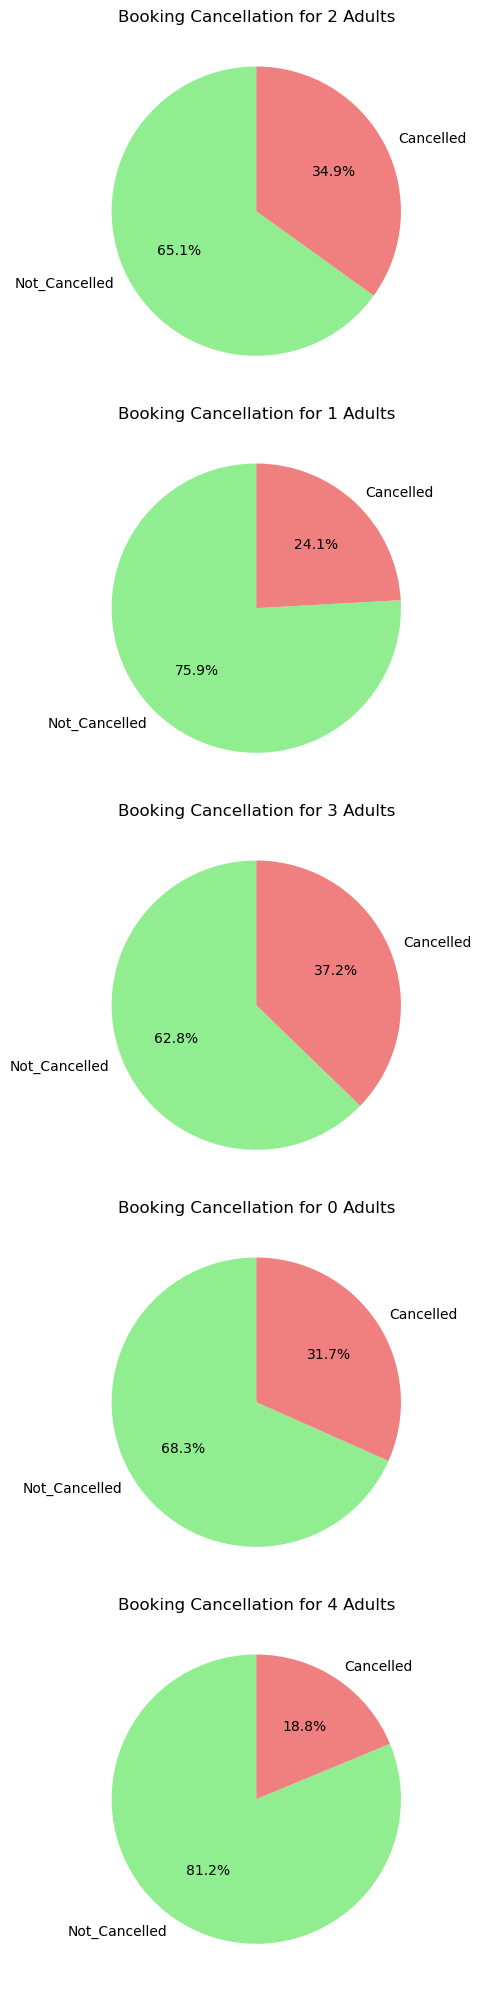

In [26]:
# Pie charts for each number of adults ratio of cxl
# Unique number of adults
unique_adults = df['no_of_adults'].unique()

# Create subplots
fig, axes = plt.subplots(len(unique_adults), 1, figsize=(8, len(unique_adults) * 4))

# Colors for the pie chart
colors = ['lightgreen', 'lightcoral']

for i, num_adults in enumerate(unique_adults):
    filtered_data = df[df['no_of_adults'] == num_adults]['booking_status'].value_counts()
    axes[i].pie(filtered_data, labels=filtered_data.index, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Booking Cancellation for {num_adults} Adults')

plt.tight_layout()
plt.show()


In [27]:
# Let's see howw many reservations are cancelled compare to how many people there are
df[["booking_status", "no_of_adults"]].value_counts()

booking_status  no_of_adults
Not_Cancelled   2               16989
Cancelled       2                9119
Not_Cancelled   1                5839
Cancelled       1                1856
Not_Cancelled   3                1454
Cancelled       3                 863
Not_Cancelled   0                  95
Cancelled       0                  44
Not_Cancelled   4                  13
Cancelled       4                   3
Name: count, dtype: int64

In [78]:
df.loc[df['no_of_adults'] == 0, 'no_of_adults'] = df['no_of_children'] 
# There were like +100 reservations where there is no adults but there were children. I made those reservation turned into
# adults reservations (the ammount compared to the total is less than 
df["has_children"] = df["no_of_children"] > 0

df["has_children"] = df["has_children"].map({True: "Yes", False: "No"})

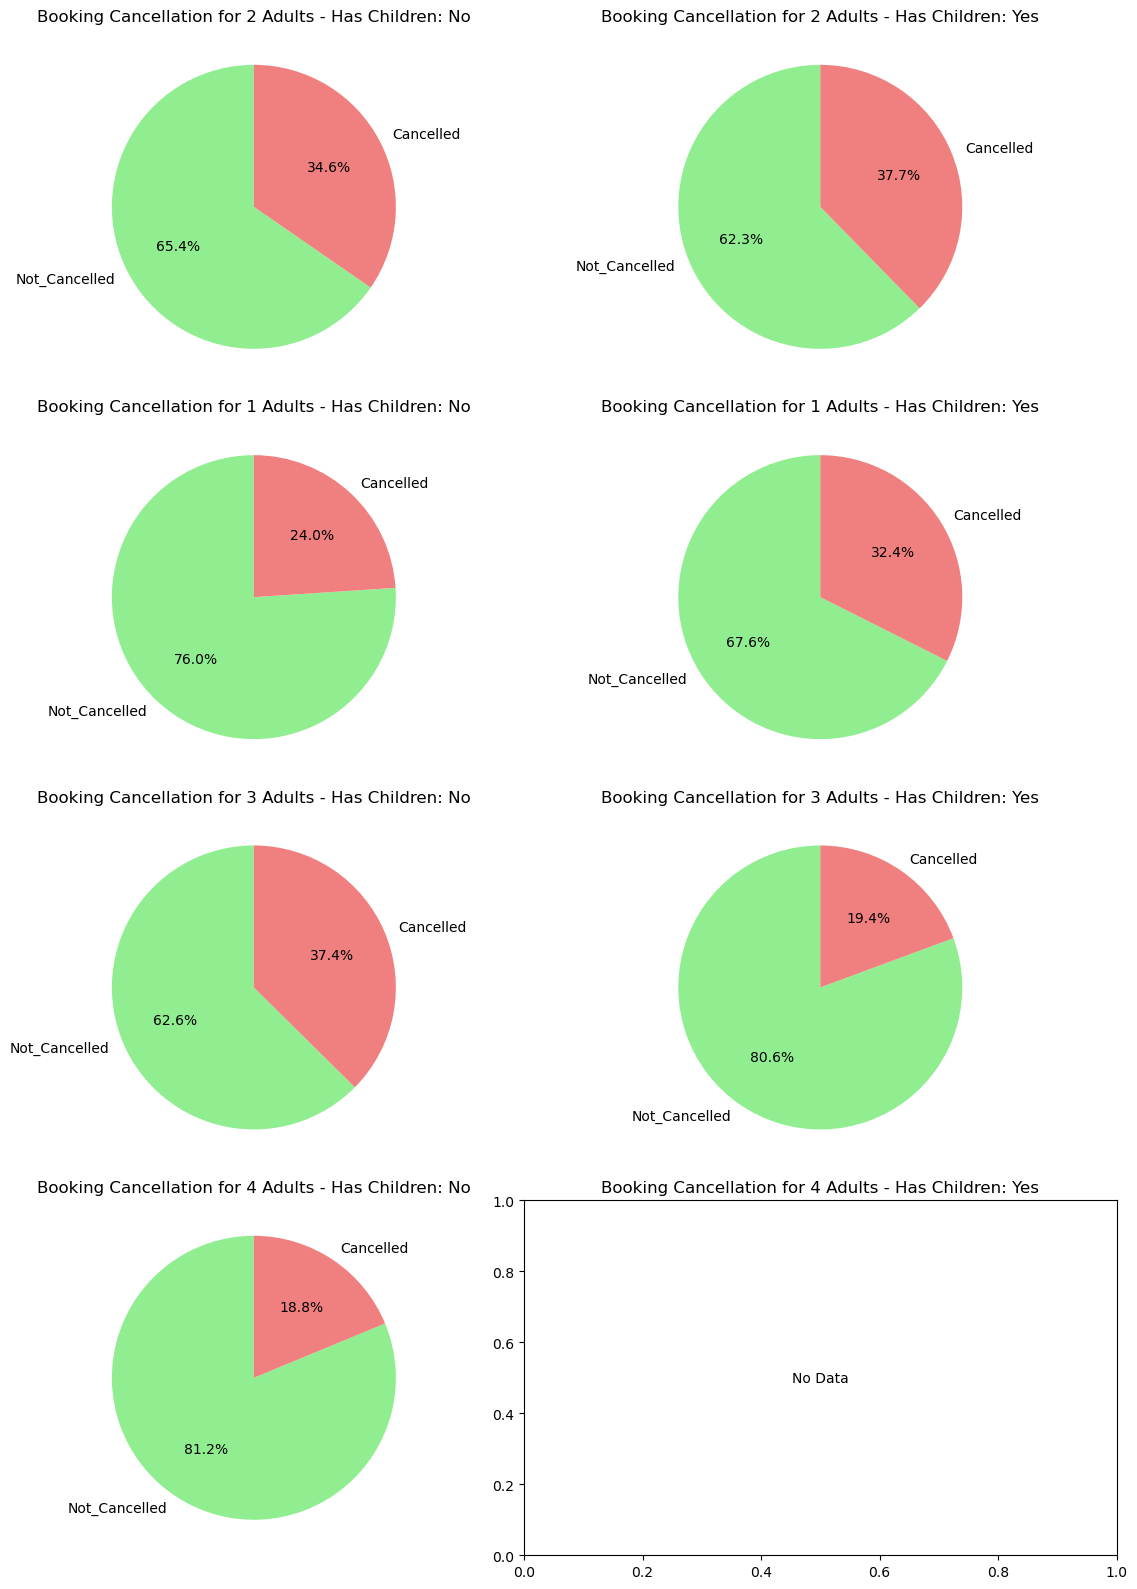

In [29]:
# Pie charts for each number of adults ratio of cxl if they were or without kids.
unique_adults = df['no_of_adults'].unique()
has_children_options = df['has_children'].unique()

# Set up a grid for subplots (two columns: one for "Yes" (has children) and one for "No" (no children))
fig, axes = plt.subplots(len(unique_adults), 2, figsize=(12, len(unique_adults) * 4))

# Colors for the pie chart
colors = ['lightgreen', 'lightcoral']

for i, num_adults in enumerate(unique_adults):
    for j, has_children in enumerate(has_children_options):
        # Filter data for the current number of adults and whether they have children
        filtered_data = df[(df['no_of_adults'] == num_adults) & (df['has_children'] == has_children)]['booking_status'].value_counts()
        
        # Check if there's data to plot
        if not filtered_data.empty:
            axes[i, j].pie(filtered_data, labels=filtered_data.index, colors=colors, autopct='%1.1f%%', startangle=90)
            axes[i, j].set_title(f'Booking Cancellation for {num_adults} Adults - Has Children: {has_children}')
        else:
            axes[i, j].text(0.5, 0.5, 'No Data', ha='center', va='center')
            axes[i, j].set_title(f'Booking Cancellation for {num_adults} Adults - Has Children: {has_children}')
        
plt.tight_layout()
plt.show()


#### Pie charts comparing number of people (with/without kids) and booking status (cancelled or not):
We can get a few things from those charts:
- The data for when the number of adults is 4 is irrelevant, there is JUST 16 reservations out of 36250.
- When the number of adults is 1 or 2, the cancellation rate increases but it drastically drops when the number of adults is 3 (WHY?!)

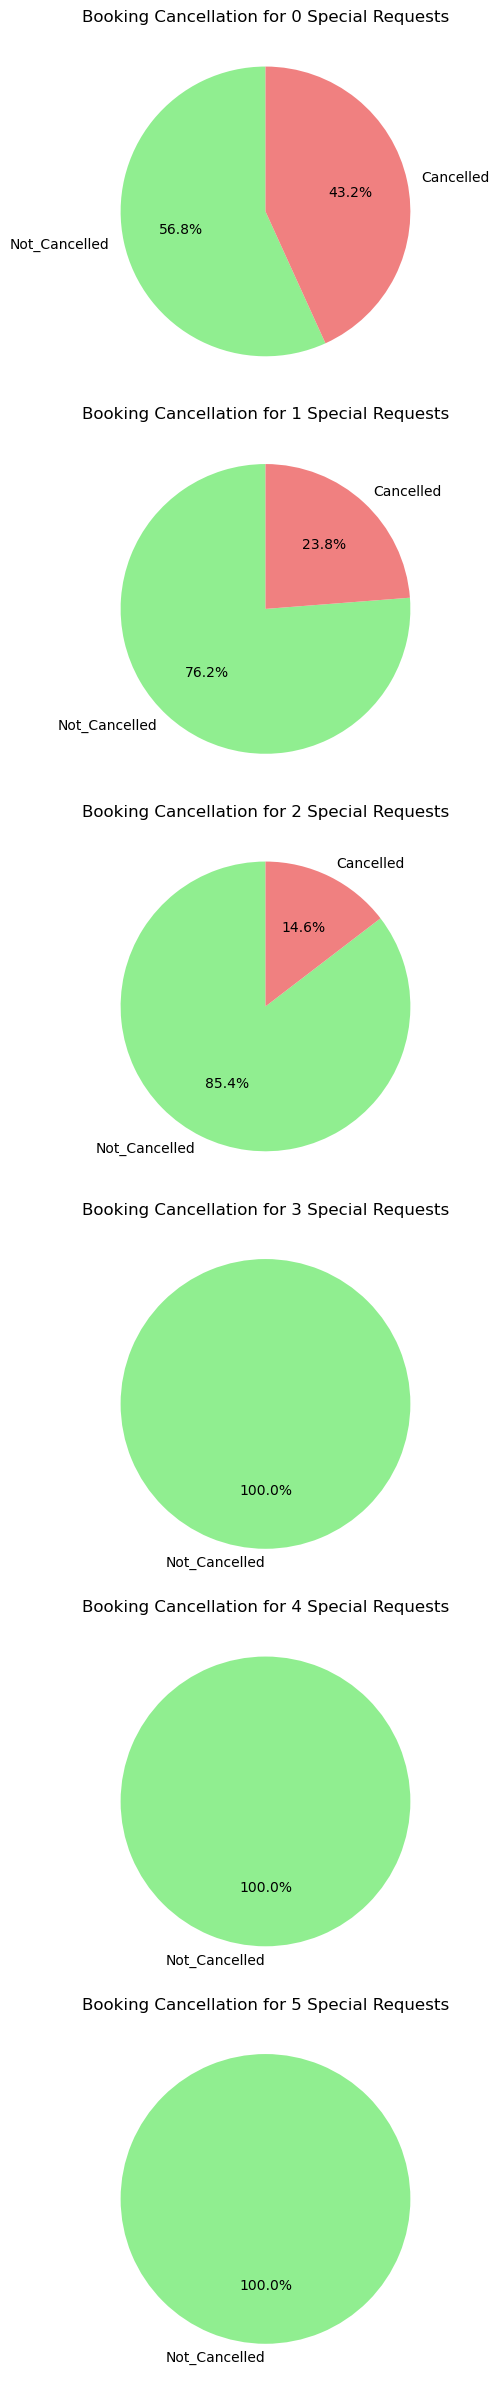

In [31]:
# Booking percentage of cancellations per number of special requests
unique_requests = df['no_of_special_requests'].unique()

fig, axes = plt.subplots(len(unique_requests), 1, figsize=(8, len(unique_requests) * 4))

colors = ['lightgreen', 'lightcoral']

for i, num_requests in enumerate(sorted(unique_requests)):
    filtered_data = df[df['no_of_special_requests'] == num_requests]['booking_status'].value_counts()
    
    if not filtered_data.empty:
        axes[i].pie(filtered_data, labels=filtered_data.index, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Booking Cancellation for {num_requests} Special Requests')
    else:
        axes[i].set_title(f'No Data for {num_requests} Special Requests')
        axes[i].axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.tight_layout()
plt.show()


#### I found something REALLY interesting with this pie charts:
- When there is 0 requests from the guest (does JUST the reservation and does not contact the hotel), 43% of the reservations are CANCELLED (54.5% of res)
- 1 request: decreases until 23.8% cancellation rate (31.4% of res)
- 2 requests: 14.6% cancellation rate (12% of res)
- 3 or more requests: 0% cancellation rate (2,1% of res)

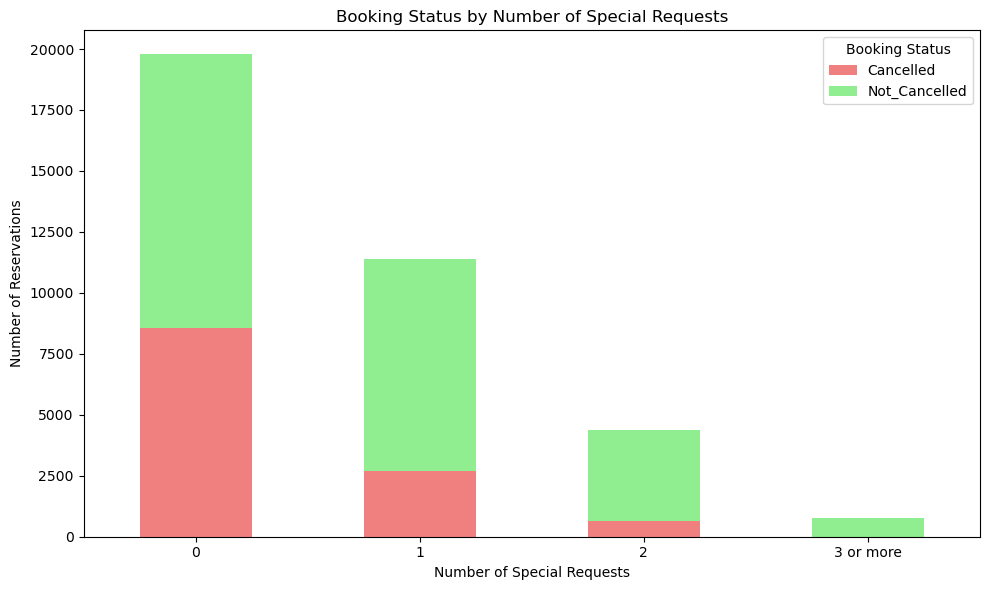

In [34]:
# Plot charts for exactly the same as the pie charts above
df['special_requests_group'] = df['no_of_special_requests'].apply(lambda x: x if x < 3 else '3 or more')

grouped_data = df.groupby(['special_requests_group', 'booking_status']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])

plt.title('Booking Status by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Booking Status', loc='upper right')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


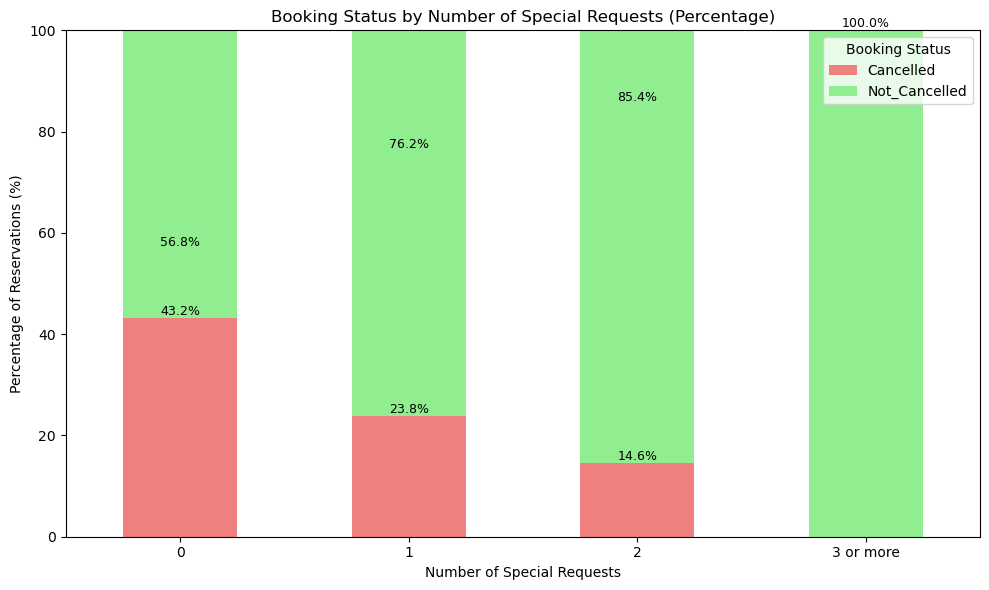

In [35]:
# Same as above but in percentage
df['special_requests_group'] = df['no_of_special_requests'].apply(lambda x: x if x < 3 else '3 or more')

# Grouping the data and calculating percentages
grouped_data = df.groupby(['special_requests_group', 'booking_status']).size().unstack(fill_value=0)

# Calculate percentage
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting the column chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])

# Adding labels and title
plt.title('Booking Status by Number of Special Requests (Percentage)')
plt.xlabel('Number of Special Requests')
plt.ylabel('Percentage of Reservations (%)')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Booking Status', loc='upper right')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100

# Adding percentage labels inside the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        # Only label bars that have a height greater than zero
        if height > 0:
            ax.annotate(f'{height:.1f}%', 
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


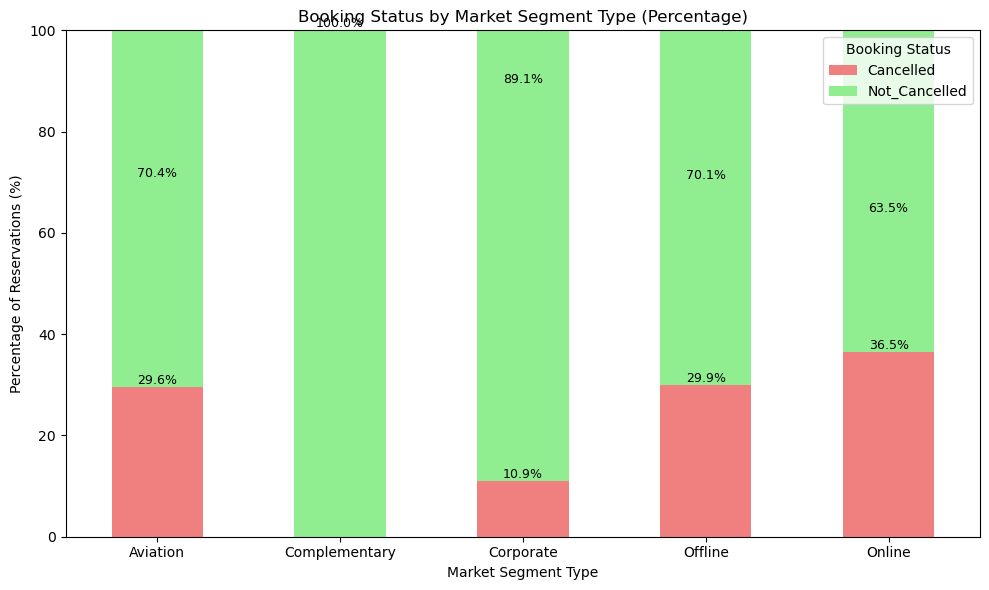

In [36]:
# Percentage of cancellations by market segment:
grouped_data = df.groupby(['market_segment_type', 'booking_status']).size().unstack(fill_value=0)

percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])

plt.title('Booking Status by Market Segment Type (Percentage)')
plt.xlabel('Market Segment Type')
plt.ylabel('Percentage of Reservations (%)')
plt.xticks(rotation=0)
plt.legend(title='Booking Status', loc='upper right')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', 
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        ha='center', va='bottom', fontsize=9)

plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [37]:
df['no_of_nights'] = df["no_of_weekend_nights"] + df["no_of_week_nights"]

df['total_revenue'] = df['no_of_nights'] * df['avg_price_per_room']

df['total_revenue'] = df['no_of_nights'] * df['avg_price_per_room']

monthly_data = df.groupby('arrival_month').agg(
    total_revenue=('total_revenue', 'sum'),
    total_nights=('no_of_nights', 'sum')
).reset_index()

monthly_data['ADR'] = monthly_data['total_revenue'] / monthly_data['total_nights']

print("Monthly ADR Data:\n", monthly_data[['arrival_month', 'ADR']])

Monthly ADR Data:
     arrival_month         ADR
0               1   76.139838
1               2   81.850922
2               3   91.686073
3               4  103.230847
4               5  113.142496
5               6  113.501710
6               7  109.719715
7               8  112.049777
8               9  117.180050
9              10  105.149285
10             11   92.355025
11             12   89.993860


Monthly Data:
    arrival_month  total_revenue  total_nights         ADR
0          April      835756.94          8096  103.230847
1         August     1383366.55         12346  112.049777
2       December      902368.43         10027   89.993860
3       February      401315.07          4903   81.850922
4        January      210983.49          2771   76.139838
5           July     1073278.25          9782  109.719715
6           June      990302.42          8725  113.501710
7          March      684619.91          7467   91.686073
8            May      874478.35          7729  113.142496
9       November      828055.15          8966   92.355025
10       October     1605314.14         15267  105.149285
11     September     1557440.04         13291  117.180050


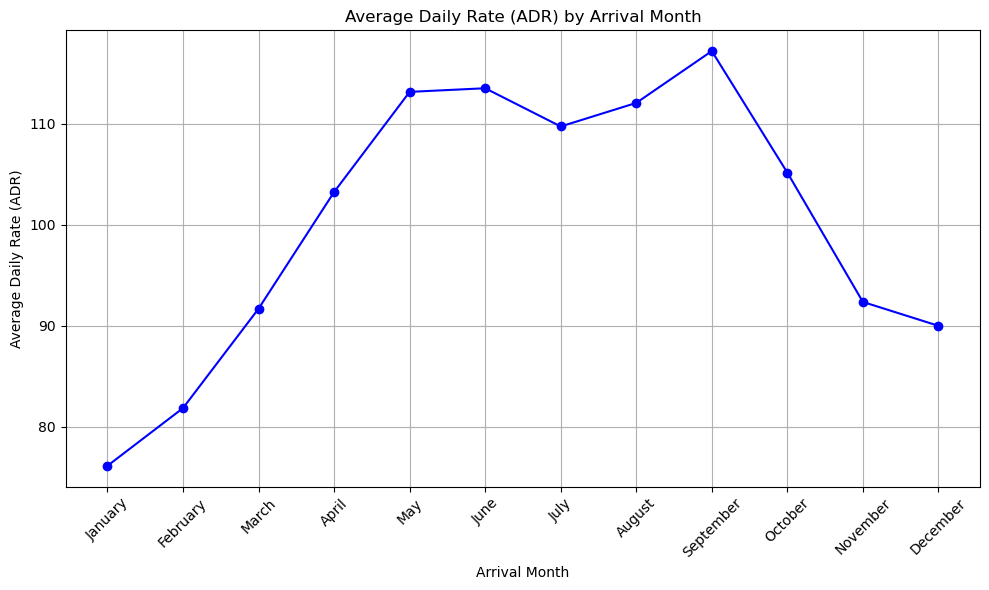

In [38]:
# ADR calculation and line chart
df['no_of_nights'] = df["no_of_weekend_nights"] + df["no_of_week_nights"]

df['total_revenue'] = df['no_of_nights'] * df['avg_price_per_room']

df['total_revenue'] = df['no_of_nights'] * df['avg_price_per_room']

monthly_data = df.groupby('arrival_month').agg(
    total_revenue=('total_revenue', 'sum'),
    total_nights=('no_of_nights', 'sum')
).reset_index()

monthly_data['ADR'] = monthly_data['total_revenue'] / monthly_data['total_nights']

print("Monthly ADR Data:\n", monthly_data[['arrival_month', 'ADR']])
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
             6: 'June', 7: 'July', 8: 'August', 9: 'September', 
             10: 'October', 11: 'November', 12: 'December'}
df['arrival_month'] = df['arrival_month'].map(month_map)

monthly_data = df.groupby('arrival_month').agg(
    total_revenue=('total_revenue', 'sum'),
    total_nights=('no_of_nights', 'sum')
).reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
monthly_data['arrival_month'] = pd.Categorical(monthly_data['arrival_month'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('arrival_month')

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['arrival_month'], monthly_data['ADR'], marker='o', linestyle='-', color='blue')

plt.title('Average Daily Rate (ADR) by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45) 
plt.grid(True) 

plt.tight_layout() 
plt.show()

In [64]:
groups_lead_time = ["0 - 7", "8 - 30", "31 - 60", "61 - 90", "91 - 180", "181 - 443"]
for time in df["lead_time"]:
    if time < 8:
        
df["lead_time_group"]
bins = [0, 7, 30, 60, 90, 180, 443]
labels = ["0 - 7", "8 - 30", "31 - 60", "61 - 90", "91 - 180", "181 - 443"]

df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=True)


Lead Time Group Counts:
 booking_status   Cancelled  Not_Cancelled
lead_time_group                          
0 - 7                  446           4058
8 - 30                1249           5361
31 - 60               1480           4827
61 - 90               1253           3255
91 - 180              3490           4282
181 - 443             3899           1378

Lead Time Group Percentages:
 booking_status   Cancelled  Not_Cancelled
lead_time_group                          
0 - 7             9.902309      90.097691
8 - 30           18.895613      81.104387
31 - 60          23.465990      76.534010
61 - 90          27.795031      72.204969
91 - 180         44.904786      55.095214
181 - 443        73.886678      26.113322


C:\Users\masii\AppData\Local\Temp\ipykernel_3128\2287318953.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df.groupby(['lead_time_group', 'booking_status']).size().unstack(fill_value=0)


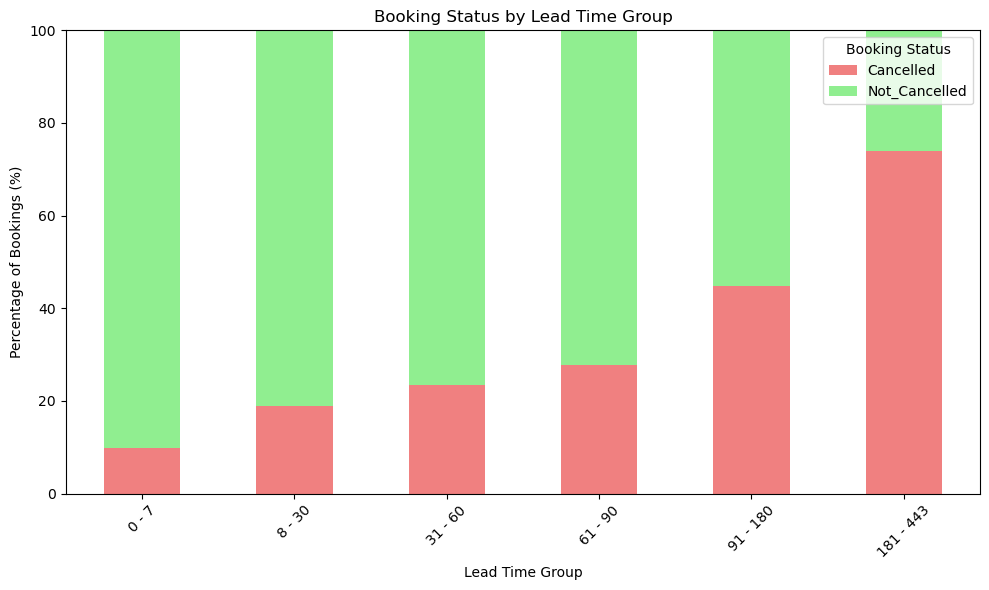

In [66]:
# Booking status by lead time group
monthly_counts = df.groupby(['lead_time_group', 'booking_status']).size().unstack(fill_value=0)

print("\nLead Time Group Counts:\n", monthly_counts)

monthly_percentage = monthly_counts.div(monthly_counts.sum(axis=1), axis=0) * 100

print("\nLead Time Group Percentages:\n", monthly_percentage)

monthly_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], figsize=(10, 6))

plt.title('Booking Status by Lead Time Group')
plt.xlabel('Lead Time Group')
plt.ylabel('Percentage of Bookings (%)')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')
plt.ylim(0, 100) 
plt.tight_layout()
plt.show()

C:\Users\masii\AppData\Local\Temp\ipykernel_3128\266869810.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['no_of_adults', 'has_children', 'lead_time_group', 'booking_status']).size().unstack(fill_value=0)



Grouped Data with Cancelled Percentages:
 booking_status  no_of_adults has_children lead_time_group  Cancelled  \
0                          1           No           0 - 7        175   
1                          1           No          8 - 30        250   
2                          1           No         31 - 60        224   
3                          1           No         61 - 90        194   
4                          1           No        91 - 180        561   
5                          1           No       181 - 443        387   
6                          1          Yes           0 - 7          1   
7                          1          Yes          8 - 30         11   
8                          1          Yes         31 - 60          7   
9                          1          Yes         61 - 90          8   
10                         1          Yes        91 - 180         12   
11                         1          Yes       181 - 443          8   
12                   

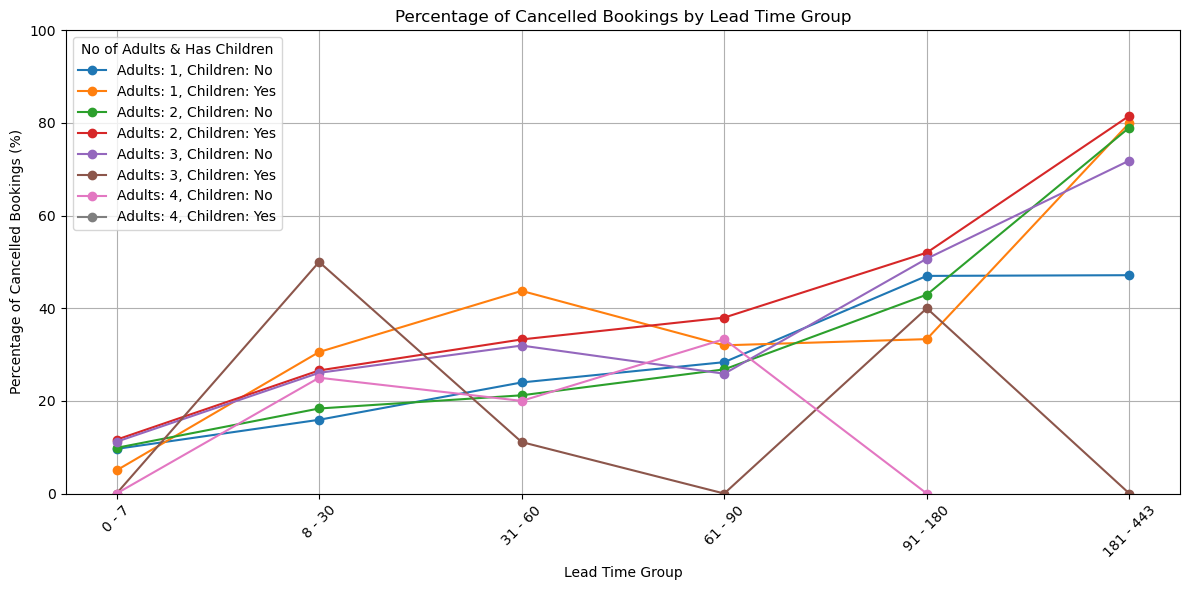

In [68]:
# Percentage of cancelled bookings by lead time group

grouped = df.groupby(['no_of_adults', 'has_children', 'lead_time_group', 'booking_status']).size().unstack(fill_value=0)

grouped['Cancelled_Percentage'] = (grouped['Cancelled'] / (grouped['Cancelled'] + grouped['Not_Cancelled'])) * 100

grouped.reset_index(inplace=True)

plt.figure(figsize=(12, 6))

for adults in grouped['no_of_adults'].unique():
    for children in grouped['has_children'].unique():
        subset = grouped[(grouped['no_of_adults'] == adults) & (grouped['has_children'] == children)]
        plt.plot(subset['lead_time_group'], subset['Cancelled_Percentage'], marker='o', label=f'Adults: {adults}, Children: {children}')

plt.title('Percentage of Cancelled Bookings by Lead Time Group')
plt.xlabel('Lead Time Group')
plt.ylabel('Percentage of Cancelled Bookings (%)')
plt.xticks(rotation=45) 
plt.ylim(0, 100)
plt.legend(title='No of Adults & Has Children')
plt.grid(True)

plt.tight_layout()
plt.show()


Grouped Data with Cancelled Percentages:
 booking_status  no_of_adults has_children lead_time_group  Cancelled  \
0                          1           No           0 - 7        175   
1                          1           No          8 - 30        250   
2                          1           No         31 - 60        224   
3                          1           No         61 - 90        194   
4                          1           No        91 - 180        561   
5                          1           No       181 - 443        387   
6                          1          Yes           0 - 7          1   
7                          1          Yes          8 - 30         11   
8                          1          Yes         31 - 60          7   
9                          1          Yes         61 - 90          8   
10                         1          Yes        91 - 180         12   
11                         1          Yes       181 - 443          8   
12                   

C:\Users\masii\AppData\Local\Temp\ipykernel_3128\238940565.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_filtered.groupby(['no_of_adults', 'has_children', 'lead_time_group', 'booking_status']).size().unstack(fill_value=0)


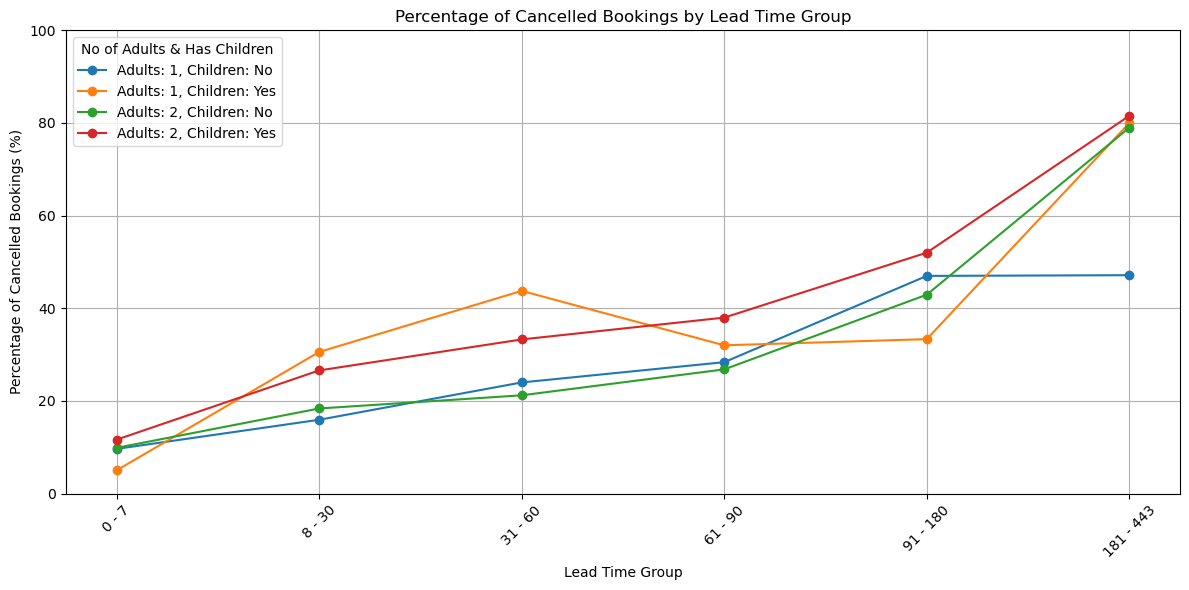

In [72]:
df_filtered = df[~df['no_of_adults'].isin([3, 4])]

grouped = df_filtered.groupby(['no_of_adults', 'has_children', 'lead_time_group', 'booking_status']).size().unstack(fill_value=0)

grouped['Cancelled_Percentage'] = (grouped['Cancelled'] / (grouped['Cancelled'] + grouped['Not_Cancelled'])) * 100

grouped.reset_index(inplace=True)

plt.figure(figsize=(12, 6))

for adults in grouped['no_of_adults'].unique():
    for children in grouped['has_children'].unique():
        subset = grouped[(grouped['no_of_adults'] == adults) & (grouped['has_children'] == children)]
        if not subset.empty:
            plt.plot(subset['lead_time_group'], subset['Cancelled_Percentage'], marker='o', label=f'Adults: {adults}, Children: {children}')

plt.title('Percentage of Cancelled Bookings by Lead Time Group')
plt.xlabel('Lead Time Group')
plt.ylabel('Percentage of Cancelled Bookings (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title='No of Adults & Has Children')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\masii\AppData\Local\Temp\ipykernel_3128\3119067109.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_filtered.groupby(['no_of_adults', 'has_children', 'lead_time_group', 'no_of_special_requests', 'booking_status']).size().unstack(fill_value=0)



Grouped Data with Cancelled Percentages:
 booking_status  no_of_adults has_children lead_time_group  \
0                          1           No           0 - 7   
1                          1           No           0 - 7   
2                          1           No           0 - 7   
3                          1           No           0 - 7   
4                          1           No           0 - 7   
..                       ...          ...             ...   
139                        2          Yes       181 - 443   
140                        2          Yes       181 - 443   
141                        2          Yes       181 - 443   
142                        2          Yes       181 - 443   
143                        2          Yes       181 - 443   

booking_status  no_of_special_requests  Cancelled  Not_Cancelled  \
0                                    0        155           1053   
1                                    1         18            461   
2                   

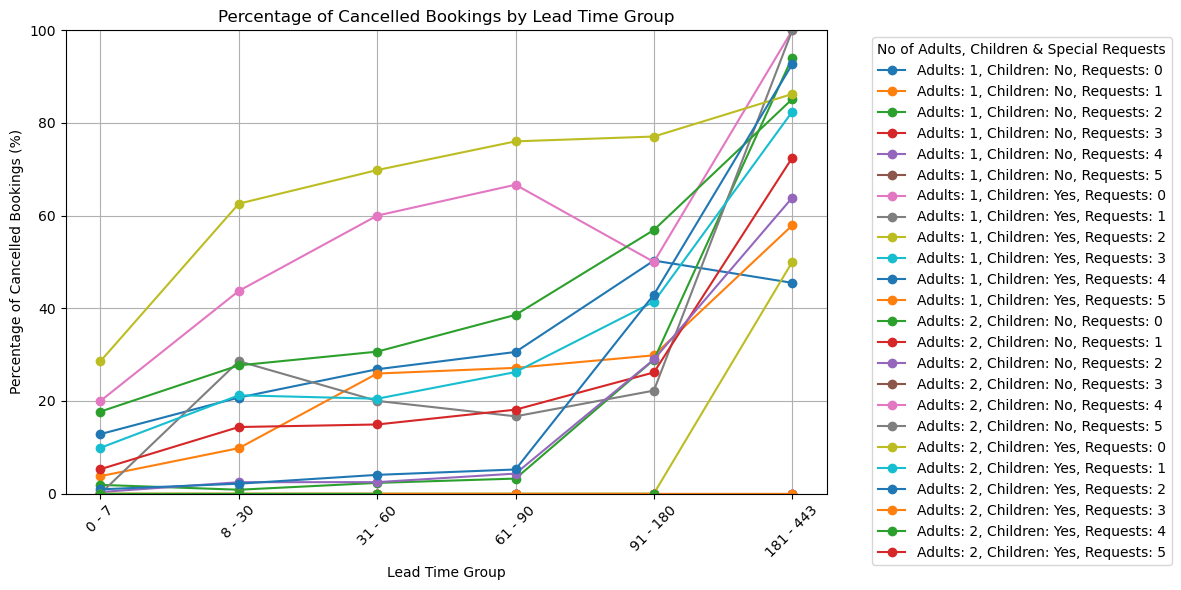

In [80]:
# percentage of cancelled bookings by lead time line chart
df_filtered = df[df['no_of_adults'].isin([1, 2])]

grouped = df_filtered.groupby(['no_of_adults', 'has_children', 'lead_time_group', 'no_of_special_requests', 'booking_status']).size().unstack(fill_value=0)

grouped['Cancelled_Percentage'] = (grouped['Cancelled'] / (grouped['Cancelled'] + grouped['Not_Cancelled'])) * 100

grouped.reset_index(inplace=True)

print("\nGrouped Data with Cancelled Percentages:\n", grouped)

plt.figure(figsize=(12, 6))

for adults in grouped['no_of_adults'].unique():
    for children in grouped['has_children'].unique():
        for requests in grouped['no_of_special_requests'].unique():
            subset = grouped[(grouped['no_of_adults'] == adults) & 
                             (grouped['has_children'] == children) & 
                             (grouped['no_of_special_requests'] == requests)]
            if not subset.empty:
                plt.plot(subset['lead_time_group'], subset['Cancelled_Percentage'], marker='o', 
                         label=f'Adults: {adults}, Children: {children}, Requests: {requests}')

plt.title('Percentage of Cancelled Bookings by Lead Time Group')
plt.xlabel('Lead Time Group')
plt.ylabel('Percentage of Cancelled Bookings (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title='No of Adults, Children & Special Requests', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\masii\AppData\Local\Temp\ipykernel_3128\3087661605.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_filtered.groupby(['no_of_adults', 'has_children', 'lead_time_group', 'no_of_special_requests', 'booking_status']).size().unstack(fill_value=0)



Grouped Data with Cancelled Percentages:
 booking_status  no_of_adults has_children lead_time_group  \
0                          1           No           0 - 7   
1                          1           No           0 - 7   
2                          1           No           0 - 7   
3                          1           No           0 - 7   
4                          1           No           0 - 7   
..                       ...          ...             ...   
139                        2          Yes       181 - 443   
140                        2          Yes       181 - 443   
141                        2          Yes       181 - 443   
142                        2          Yes       181 - 443   
143                        2          Yes       181 - 443   

booking_status  no_of_special_requests  Cancelled  Not_Cancelled  \
0                                    0        155           1053   
1                                    1         18            461   
2                   

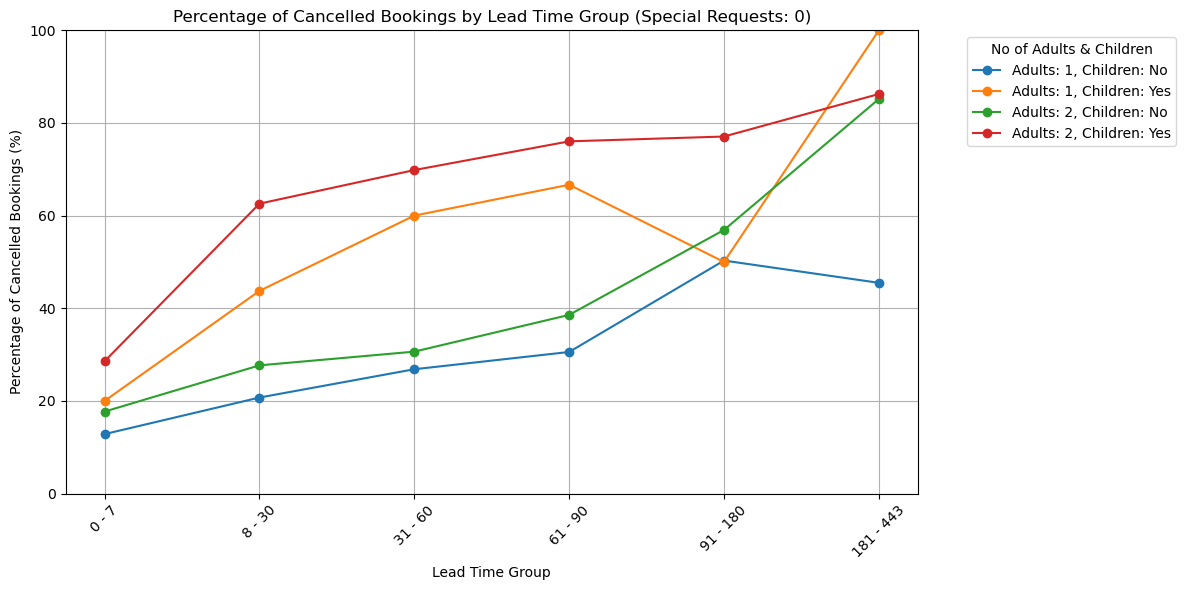

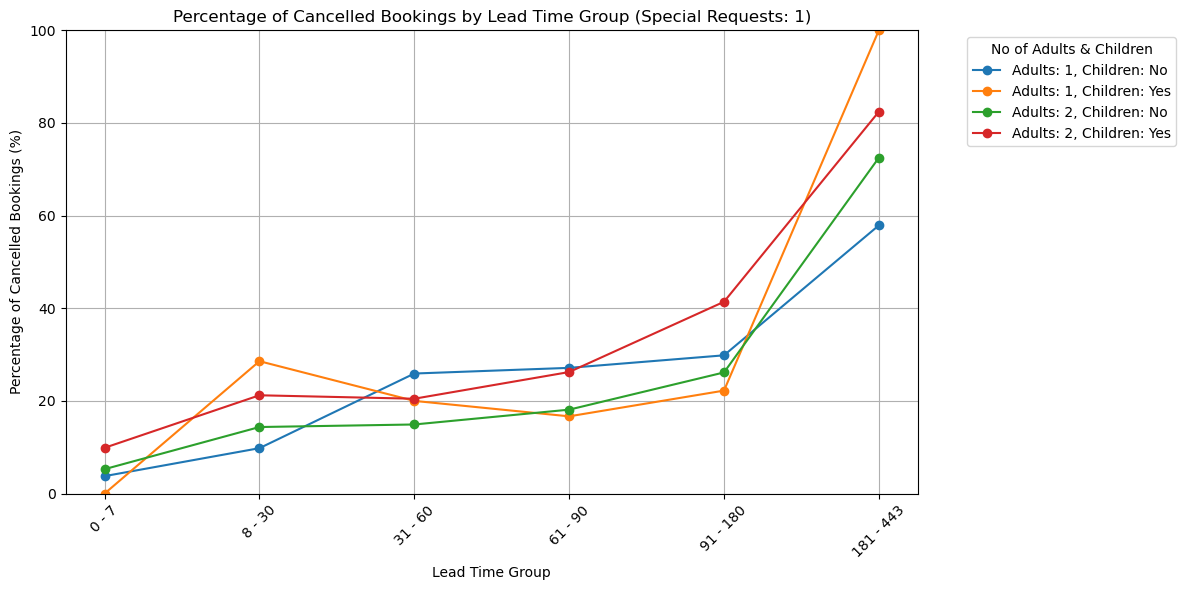

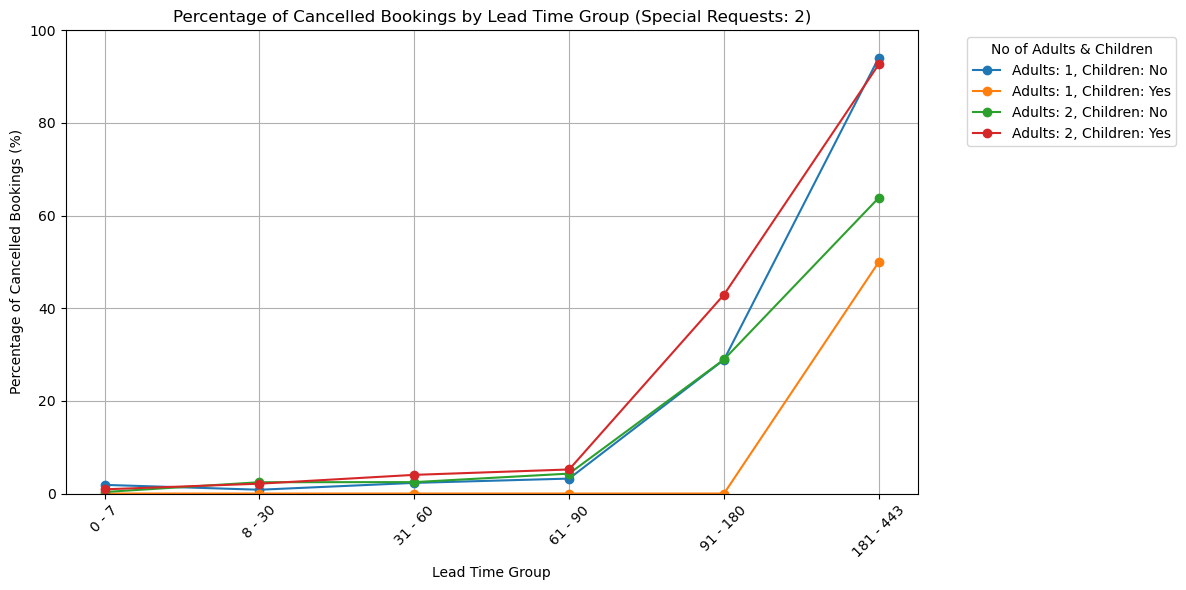

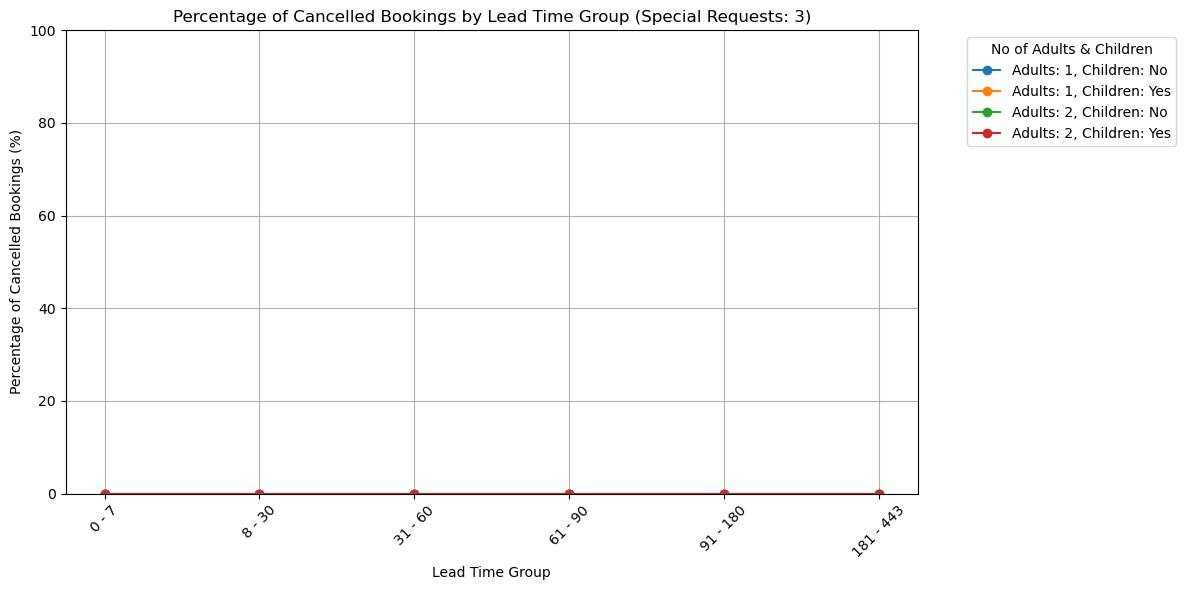

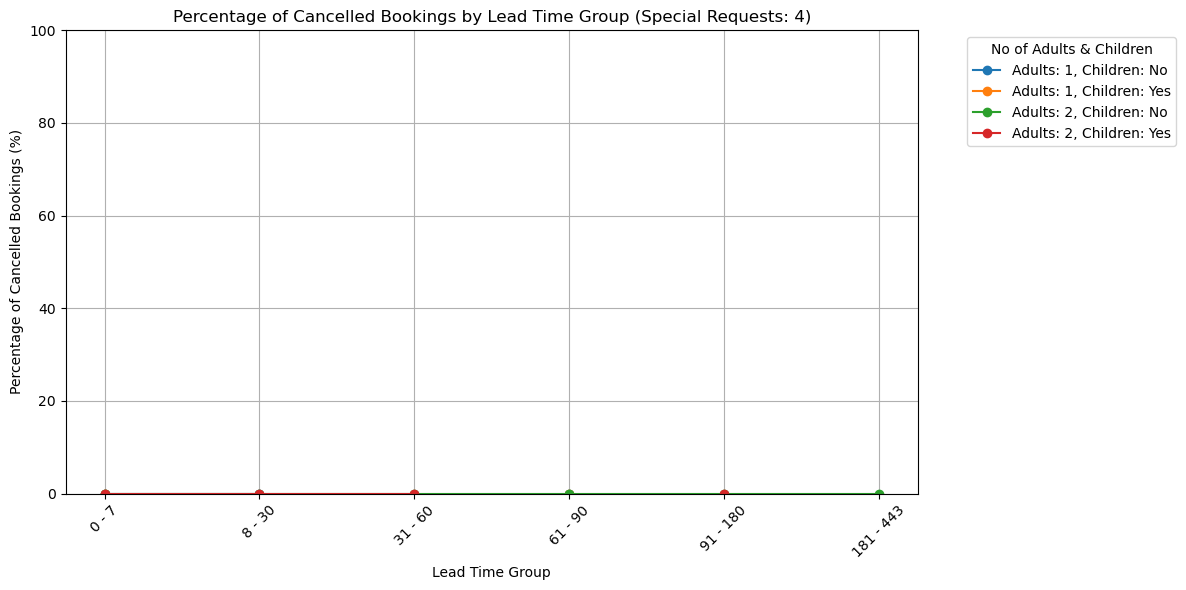

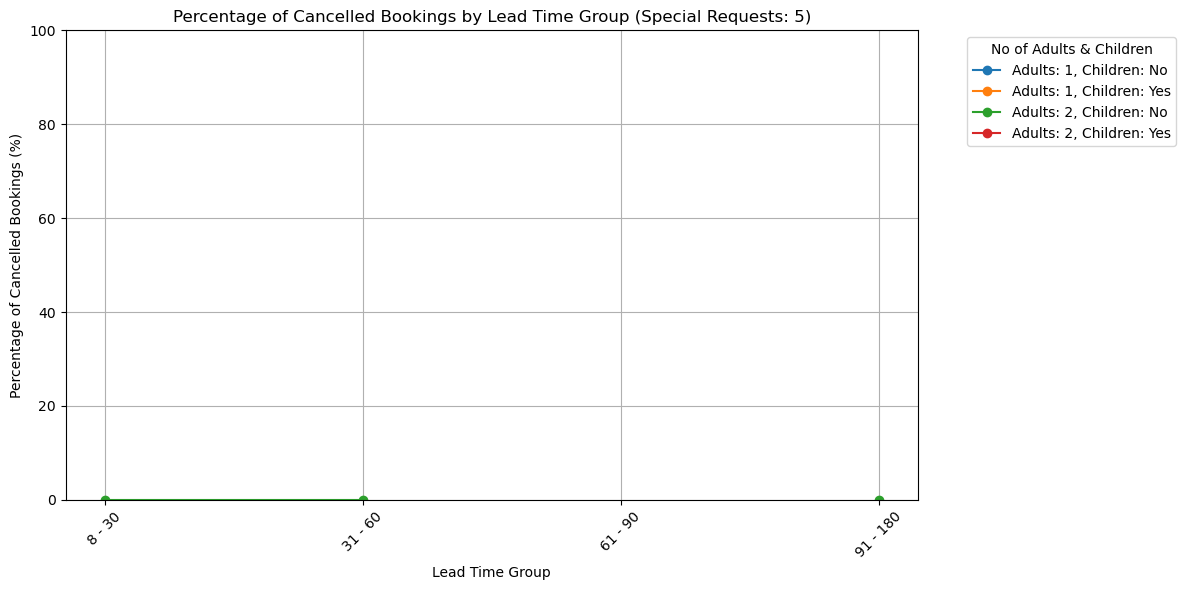

In [76]:
# Same but separated by number of adults

df_filtered = df[df['no_of_adults'].isin([1, 2])]

# Step 2: Group by relevant columns and calculate the counts
grouped = df_filtered.groupby(['no_of_adults', 'has_children', 'lead_time_group', 'no_of_special_requests', 'booking_status']).size().unstack(fill_value=0)

# Step 3: Calculate percentages of cancellations
grouped['Cancelled_Percentage'] = (grouped['Cancelled'] / (grouped['Cancelled'] + grouped['Not_Cancelled'])) * 100

# Step 4: Reset index to plot
grouped.reset_index(inplace=True)

# Debugging: Print the grouped data with percentages
print("\nGrouped Data with Cancelled Percentages:\n", grouped)

# Step 5: Create separate plots for each number of special requests
unique_requests = grouped['no_of_special_requests'].unique()

for requests in unique_requests:
    plt.figure(figsize=(12, 6))
    
    # Loop through combinations of no_of_adults and has_children to create separate lines
    for adults in grouped['no_of_adults'].unique():
        for children in grouped['has_children'].unique():
            subset = grouped[(grouped['no_of_adults'] == adults) & 
                             (grouped['has_children'] == children) & 
                             (grouped['no_of_special_requests'] == requests)]
            if not subset.empty:  # Only plot if there is data for the combination
                plt.plot(subset['lead_time_group'], subset['Cancelled_Percentage'], marker='o', 
                         label=f'Adults: {adults}, Children: {children}')

    # Adding labels and title for each subplot
    plt.title(f'Percentage of Cancelled Bookings by Lead Time Group (Special Requests: {requests})')
    plt.xlabel('Lead Time Group')
    plt.ylabel('Percentage of Cancelled Bookings (%)')
    plt.xticks(rotation=45)  # Rotate x labels for readability
    plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
    plt.legend(title='No of Adults & Children', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)  # Add a grid for better readability

    # Show each plot
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
